<a id = 'toc'></a>
# Table of Contents

- ### [Preprocessing-Light](#preprocessing_light)
- ### [Preprocessing-Pandas](#preprocessing_pandas)
- ### [Word vectorization](#word_vectorization)
- ### [Example 1](#example_1)
- ### [Gensim](#gensim)

<a id = 'preprocessing_light'></a>
# Preprocessing-Light

---
## Decoding
converting a sequence of bytes into a sequence of characters.

- **Unpacking** \
*.plain/.zip/.gz/...*
- **Encoding** \
*ASCII/utf-8/Windows-1251/...*
- **Format** \
*csv/xml/json/doc/...*

---

## Split into tokens
splitting a sequence of characters into parts (tokens), possibly excluding some characters from consideration.
Naive approach: split the string with spaces and throw out punctuation marks.

**Problems:**  
* example@example.com, 127.0.0.1
* С++, C#
* York University vs New York University
* Language dependency (“Lebensversicherungsgesellschaftsangestellter”, “l’amour”)

Alternative: n-grams

---

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.tokenize import RegexpTokenizer

sequence = 'The quick brown fox jumps, and jumps over the lazy dog'

tokenizer = RegexpTokenizer('\w+|[^\w\s]+')
for token in tokenizer.tokenize(sequence):
    print(token)

The
quick
brown
fox
jumps
,
and
jumps
over
the
lazy
dog


---
## Stop words
the most frequent words in the language that do not contain any information about the content of the text

**Problem**: To be or not to be.

---

In [3]:
from nltk.corpus import stopwords

print(' '.join(stopwords.words('english')[1:20]))

me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his


---
## Normalization
Bringing tokens to a single form in order to get rid of superficial differences in spelling

**Approaches:**
* formulate a set of rules by which the token is transformed \
New-Yorker → new-yorker → newyorker → newyork
* explicity store connections betweens tokens (WordNet - Princeton) \
car → auto, Window 6 → window
машина → автомобиль, Windows 6→ window

---

In [4]:
word = 'New-Yorker'

word_1 = word.lower()

import re
word_2 = re.sub(r'\W', '', word_1, flags = re.U)

word_3 = re.sub(r'er', '', word_2, flags = re.U)

print(f'{word} → {word_1} → {word_2} → {word_3}')

New-Yorker → new-yorker → newyorker → newyork


---
## Stemming and Lemmatization
**Stemming** is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.
**Lemmatization** considers the conext and converts the word to its meaningful base form, which is called *Lemma*.

**Example:**
* Steeming
Caring → Car
* Lemmatization
Caring → Care

---

## Stemming

In [5]:
from nltk.stem.snowball import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

p_stemmer = PorterStemmer()
print(f'[Porter Stemmer]: {p_stemmer.stem("New-Yorker")}')
print(f'[Porter Stemmer]: {p_stemmer.stem("Tokenization")}')

eng_stemmer = EnglishStemmer()
print(f'[English Stemmer]: {eng_stemmer.stem("Perfection")}')
print(f'[English Stemmer]: {eng_stemmer.stem("Difference")}')

[Porter Stemmer]: new-york
[Porter Stemmer]: token
[English Stemmer]: perfect
[English Stemmer]: differ


## Lemmatization

In [6]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
print(f'[pymorphy2]: {morph.parse("New-Yorker")[0].normal_form}')
print(f'[pymorphy2]: {morph.parse("Tokenization")[0].normal_form}')
print(f'[pymorphy2]: {morph.parse("Perfection")[0].normal_form}')
print(f'[pymorphy2]: {morph.parse("Difference")[0].normal_form}')

[pymorphy2]: new-yorker
[pymorphy2]: tokenization
[pymorphy2]: perfection
[pymorphy2]: difference


---

## Heap's Law (Herdan's law)
An empirical regularity in linguistics that describes the distribution of the number of unique words in a document (or set of documents) as a function of it's length.


$ M = kT^{\beta}$
- $M$ - dictionary size
- $T$ - word count
- $30 \leq k \leq 100, b \approx 0.5$

---

[UP](#toc)

<a id = 'preprocessing_pandas'></a>
# Preprocessing-Pandas

#### Using methods

In [8]:
import pandas as pd

sequences_list = pd.Series(['Our mother washed - The Dishes', 'The countdown, Is over'], dtype = "string")
print(f'[BEFORE]: {sequences_list[0]}')

sequences_list = sequences_list.str.lower()
sequences_list = sequences_list.str.strip()
#sequences_list = sequences_list.str.split(' ', expand = True)
sequences_list = sequences_list.str.split(' ')
print(f'[AFTER]: {sequences_list[0]}')

[BEFORE]: Our mother washed - The Dishes
[AFTER]: ['our', 'mother', 'washed', '-', 'the', 'dishes']


#### Using functions

In [9]:
import string
import pymorphy2

morpher = pymorphy2.MorphAnalyzer()
sw = ['dishes']

def preprocess_txt(line):
    exclude = set(string.punctuation)
    spls = ''.join(i for i in line.strip() if i not in exclude).split()
    spls = [morpher.parse(i.lower())[0].normal_form for i in spls]
    spls = [i for i in spls if i not in sw and i != '']
    return spls
    
sequences_list = pd.Series(['Our mother washed - The Dishes', 'The countdown, Is over'], dtype = "string")
print(f'[BEFORE]: {sequences_list[0]}')
sequences_list = sequences_list.apply(lambda x: preprocess_txt(x))
print(f'[AFTER]: {sequences_list[0]}')

[BEFORE]: Our mother washed - The Dishes
[AFTER]: ['our', 'mother', 'washed', 'the']


[UP](#toc)

<a id = 'word_vectorization'></a>
# Word vectorization

### Bag-of-Words

In [13]:
documents = ["I like this movie, it's funny.", "I hate this movie."
             , "This was awesome! I like it.", "Nice one. I love it."]

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(documents)

count_vectorizer.fit_transform(documents)

feature_names = count_vectorizer.get_feature_names_out()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

,awesome,funny,hate,it,like,love,movie,nice,one,this,was
0,0,1,0,1,1,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,0,1,1,0,0


### N-gramm

In [14]:
from nltk.util import ngrams

text = "I like this movie, it's funny. I hate this movie. This was awesome! I like it. Nice one. I love it."

tokenized = text.split()
bigrams = ngrams(tokenized, 2)
for i in bigrams:
    print(i)

('I', 'like')
('like', 'this')
('this', 'movie,')
('movie,', "it's")
("it's", 'funny.')
('funny.', 'I')
('I', 'hate')
('hate', 'this')
('this', 'movie.')
('movie.', 'This')
('This', 'was')
('was', 'awesome!')
('awesome!', 'I')
('I', 'like')
('like', 'it.')
('it.', 'Nice')
('Nice', 'one.')
('one.', 'I')
('I', 'love')
('love', 'it.')


### TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

document = ["I like this movie, it's funny.", "I hate this movie."
            , "This was awesome! I like it.", "Nice one. I love it."]
tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(document)

feature_name = tfidf_vectorizer.get_feature_names_out()
pd.DataFrame(values.toarray(), columns = feature_names)

,awesome,funny,hate,it,like,love,movie,nice,one,this,was
0,0.000000,0.571848,0.000000,0.365003,0.450852,0.000000,0.450852,0.000000,0.000000,0.365003,0.000000
1,0.000000,0.000000,0.702035,0.000000,0.000000,0.000000,0.553492,0.000000,0.000000,0.448100,0.000000
2,0.539445,0.000000,0.000000,0.344321,0.425305,0.000000,0.000000,0.000000,0.000000,0.344321,0.539445
3,0.000000,0.000000,0.000000,0.345783,0.000000,0.541736,0.000000,0.541736,0.541736,0.000000,0.000000


### Hashing

In [16]:
from sklearn.feature_extraction.text import HashingVectorizer

document = ["I like this movie, it's funny.", "I hate this movie."
            , "This was awesome! I like it.", "Nice one. I love it."]

vectorizer = HashingVectorizer()
values = vectorizer.fit_transform(document)

pd.DataFrame(values.toarray())

,0,1,2,3,4,5,6,7,8,9,...,1048566,1048567,1048568,1048569,1048570,1048571,1048572,1048573,1048574,1048575
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id = 'example_1'></a>
# Example 1

In [2]:
import numpy as np
import matplotlib.pyplot
%matplotlib inline

import datasets
import tokenizers
import wandb
from tqdm.auto import tqdm

import torch 
import torch.nn as nn
import torch.nn.functional as F

In [3]:
dataset = datasets.load_dataset('imdb'
                                , split = 'train'
                                , download_mode = 'force_redownload')

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [4]:
df = dataset
df = datasets.load_dataset('imdb')

In [5]:
df

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

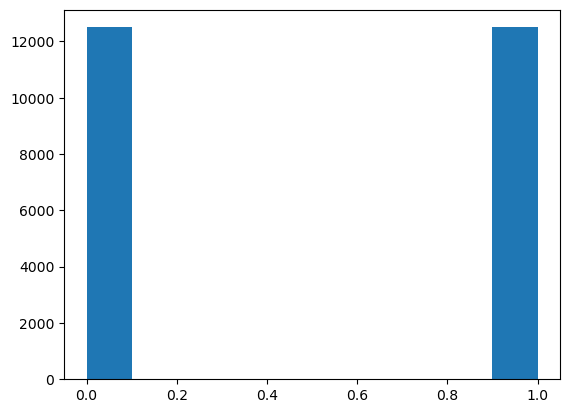

In [6]:
import matplotlib.pyplot as plt

train_labels = [i['label'] for i in df['train']]
plt.hist(train_labels)
plt.show()

### Classification using Linear Models

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(max_features = 25000)
values = vectorizer.fit_transform(df['train']['text'])

feature_names = vectorizer.get_feature_names_out()
pd.DataFrame(values.toarray(), columns = feature_names)

,00,000,007,00s,01,02,03,04,05,06,...,zooming,zooms,zorak,zorro,zp,zu,zucker,zulu,zuniga,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
vectorizer = TfidfVectorizer(max_features = 25000)
vectorizer = vectorizer.fit(df['train']['text'])

x_train = vectorizer.transform(df['train']['text'])
y_train = np.array(df['train']['label'])

x_test = vectorizer.transform(df['test']['text'])
y_test = np.array(df['test']['label'])

x_train, y_train

(<25000x25000 sparse matrix of type '<class 'numpy.float64'>'
 	with 3355130 stored elements in Compressed Sparse Row format>,
 array([0, 0, 0, ..., 1, 1, 1]))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

model = LogisticRegression()
model = model.fit(x_train, y_train)

log_pred = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, log_pred))
acc = accuracy_score(y_test, log_pred)

print(f'[RMSE]: {rmse:.2f}, [ACC]: {acc:.2f}')

[RMSE]: 0.34, [ACC]: 0.88


#### Testing model prediction

In [10]:
positive_comment = 'This movie is awesome!'
vec = vectorizer.transform([positive_comment])
positive_pred = model.predict(vec)

negative_comment = 'This movie is awful!'
vec = vectorizer.transform([negative_comment])
negative_pred = model.predict(vec)

print(f'[PositiveComment]: {positive_pred[0]}, \
[NegativeComment]: {negative_pred[0]}')

[PositiveComment]: 1, [NegativeComment]: 0


<a id = 'gensim'></a>
# Gensim

In [4]:
import gensim.downloader as api

word_vectors = api.load('glove-wiki-gigaword-100')

result = word_vectors.most_similar(positive = ['woman', 'king'], negative = ['man'])
print(word_vectors.doesnt_match('breakfast dinner cereal lunch'.split()))

similarity = word_vectors.similarity('woman', 'man')
print(f'{similarity:.2f}')

<a id = 'kmeans_inertia'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Inertia
</h2>
</div>    
</left>